**Heart Disease Dataset Feature**

| **영문 컬럼명**              | **한글 설명**                            |
| ----------------------- | ------------------------------------ |
| Age                     | 나이 (연령, 년 단위)                        |
| Gender                  | 성별 (남성/여성)                           |
| Cholesterol             | 콜레스테롤 수치 (mg/dL)                     |
| Blood Pressure          | 혈압(수축기, mmHg)                        |
| Heart Rate              | 심박수 (분당 박동수)                         |
| Smoking                 | 흡연 상태 (비흡연/과거 흡연/현재 흡연)              |
| Alcohol Intake          | 음주 빈도 (없음/적당/과다)                     |
| Exercise Hours          | 주당 운동 시간 (시간)                        |
| Family History          | 심장질환 가족력 (있음/없음)                     |
| Diabetes                | 당뇨병 여부 (있음/없음)                       |
| Obesity                 | 비만 여부 (있음/없음)                        |
| Stress Level            | 스트레스 수준 (1\~10 척도)                   |
| Blood Sugar             | 공복 혈당 수치 (mg/dL)                     |
| Exercise Induced Angina | 운동 유발 협심증 여부 (있음/없음)                 |
| Chest Pain Type         | 흉통 유형 (전형적 협심증/비전형 협심증/비협심증성 흉통/무증상) |
| Heart Disease           | 심장질환 유무 (타겟 변수, 0: 없음, 1: 있음)        |


In [ ]:
# 1. 필수 라이브러리 설치
!pip install xgboost scikit-learn tensorflow matplotlib seaborn --quiet


In [15]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 폰트 설정
font_path='/System/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

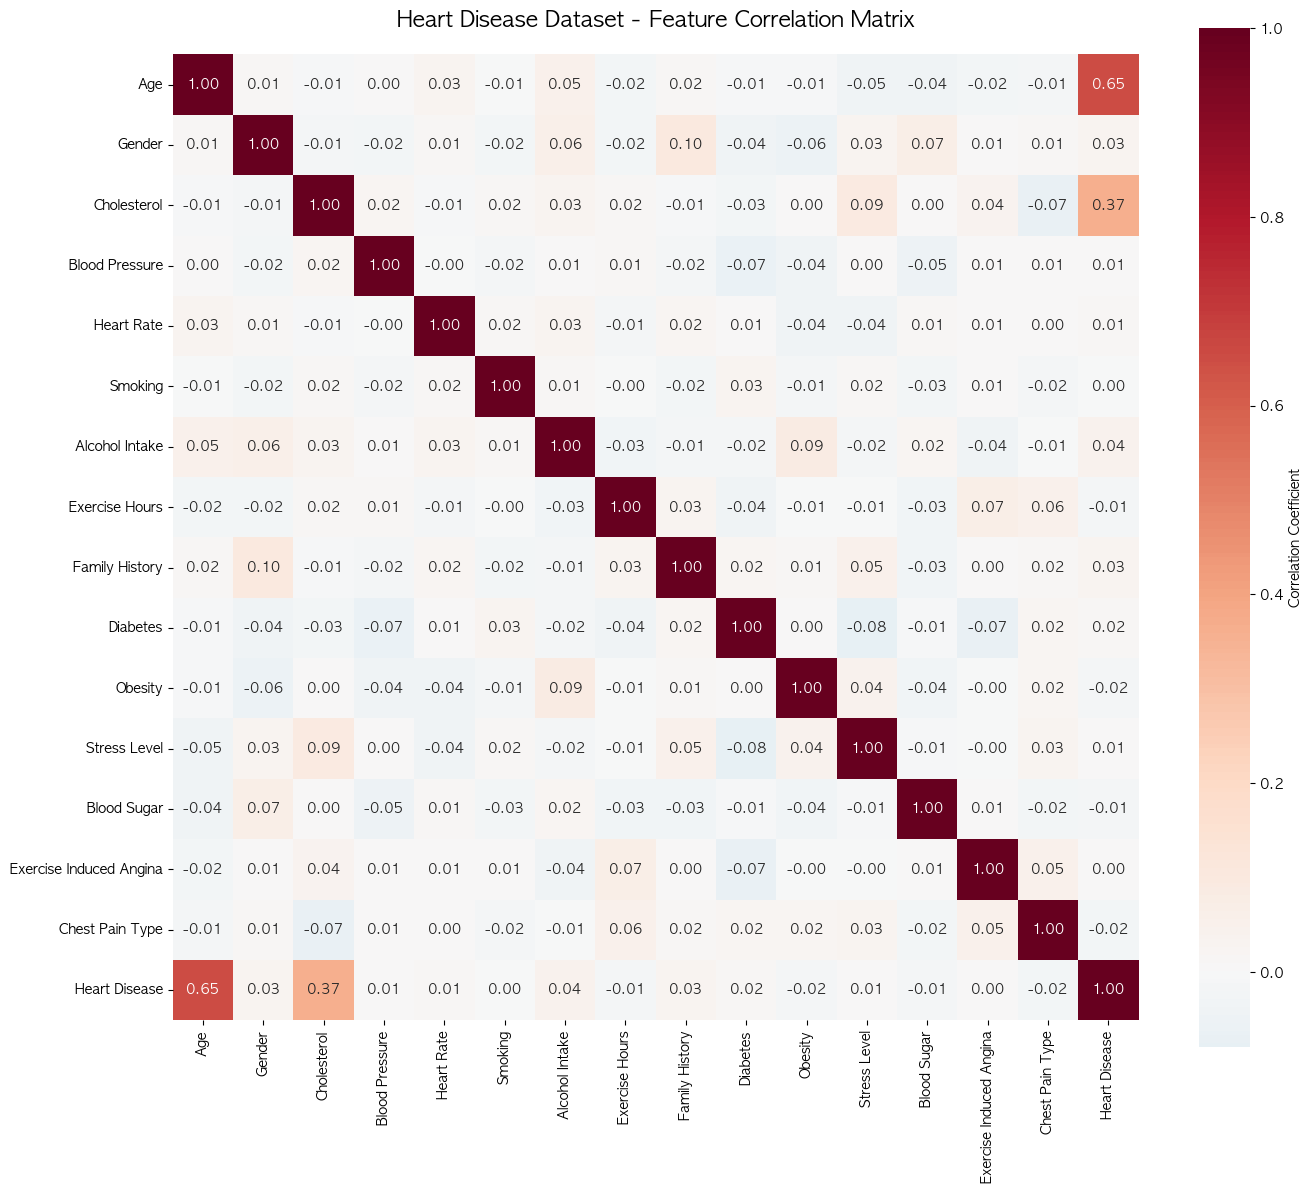

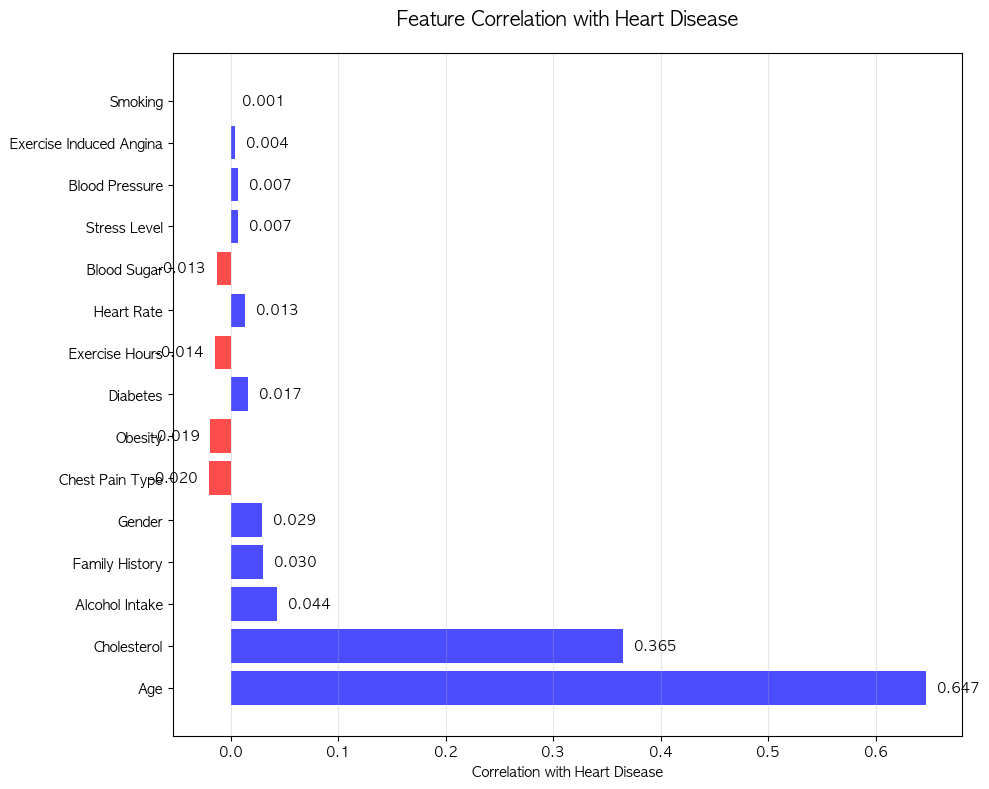

Heart Disease와 각 특성간의 상관관계:
Age                       :  0.647 (강한 양의 상관관계)
Cholesterol               :  0.365 (중간 양의 상관관계)
Alcohol Intake            :  0.044 (약한 양의 상관관계)
Family History            :  0.030 (약한 양의 상관관계)
Gender                    :  0.029 (약한 양의 상관관계)
Chest Pain Type           : -0.020 (약한 음의 상관관계)
Obesity                   : -0.019 (약한 음의 상관관계)
Diabetes                  :  0.017 (약한 양의 상관관계)
Exercise Hours            : -0.014 (약한 음의 상관관계)
Heart Rate                :  0.013 (약한 양의 상관관계)
Blood Sugar               : -0.013 (약한 음의 상관관계)
Stress Level              :  0.007 (약한 양의 상관관계)
Blood Pressure            :  0.007 (약한 양의 상관관계)
Exercise Induced Angina   :  0.004 (약한 양의 상관관계)
Smoking                   :  0.001 (약한 양의 상관관계)


In [26]:
# Heart Disease 상관관계 분석
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 데이터셋에 타겟 변수 포함하여 상관관계 계산
df_corr = X.copy()
df_corr['Heart Disease'] = y

# 상관관계 행렬 계산
correlation_matrix = df_corr.corr()

# 1. 전체 상관관계 히트맵
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Heart Disease Dataset - Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 2. Heart Disease와의 상관관계만 따로 시각화
heart_disease_corr = correlation_matrix['Heart Disease'].drop('Heart Disease').sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'blue' for x in heart_disease_corr.values]
bars = plt.barh(range(len(heart_disease_corr)), heart_disease_corr.values, color=colors, alpha=0.7)
plt.yticks(range(len(heart_disease_corr)), heart_disease_corr.index)
plt.xlabel('Correlation with Heart Disease')
plt.title('Feature Correlation with Heart Disease', fontsize=14, pad=20)
plt.grid(axis='x', alpha=0.3)

# 막대 위에 상관계수 값 표시
for i, (bar, value) in enumerate(zip(bars, heart_disease_corr.values)):
    plt.text(value + (0.01 if value >= 0 else -0.01), i, f'{value:.3f}', 
             va='center', ha='left' if value >= 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. 상관관계 수치 출력
print("Heart Disease와 각 특성간의 상관관계:")
print("=" * 50)
for feature, corr_value in heart_disease_corr.items():
    direction = "양의 상관관계" if corr_value > 0 else "음의 상관관계"
    strength = "강한" if abs(corr_value) > 0.5 else "중간" if abs(corr_value) > 0.3 else "약한"
    print(f"{feature:25} : {corr_value:6.3f} ({strength} {direction})")

수치형 컬럼 (15개): ['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History', 'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar', 'Exercise Induced Angina', 'Chest Pain Type']
범주형 컬럼 (0개): []


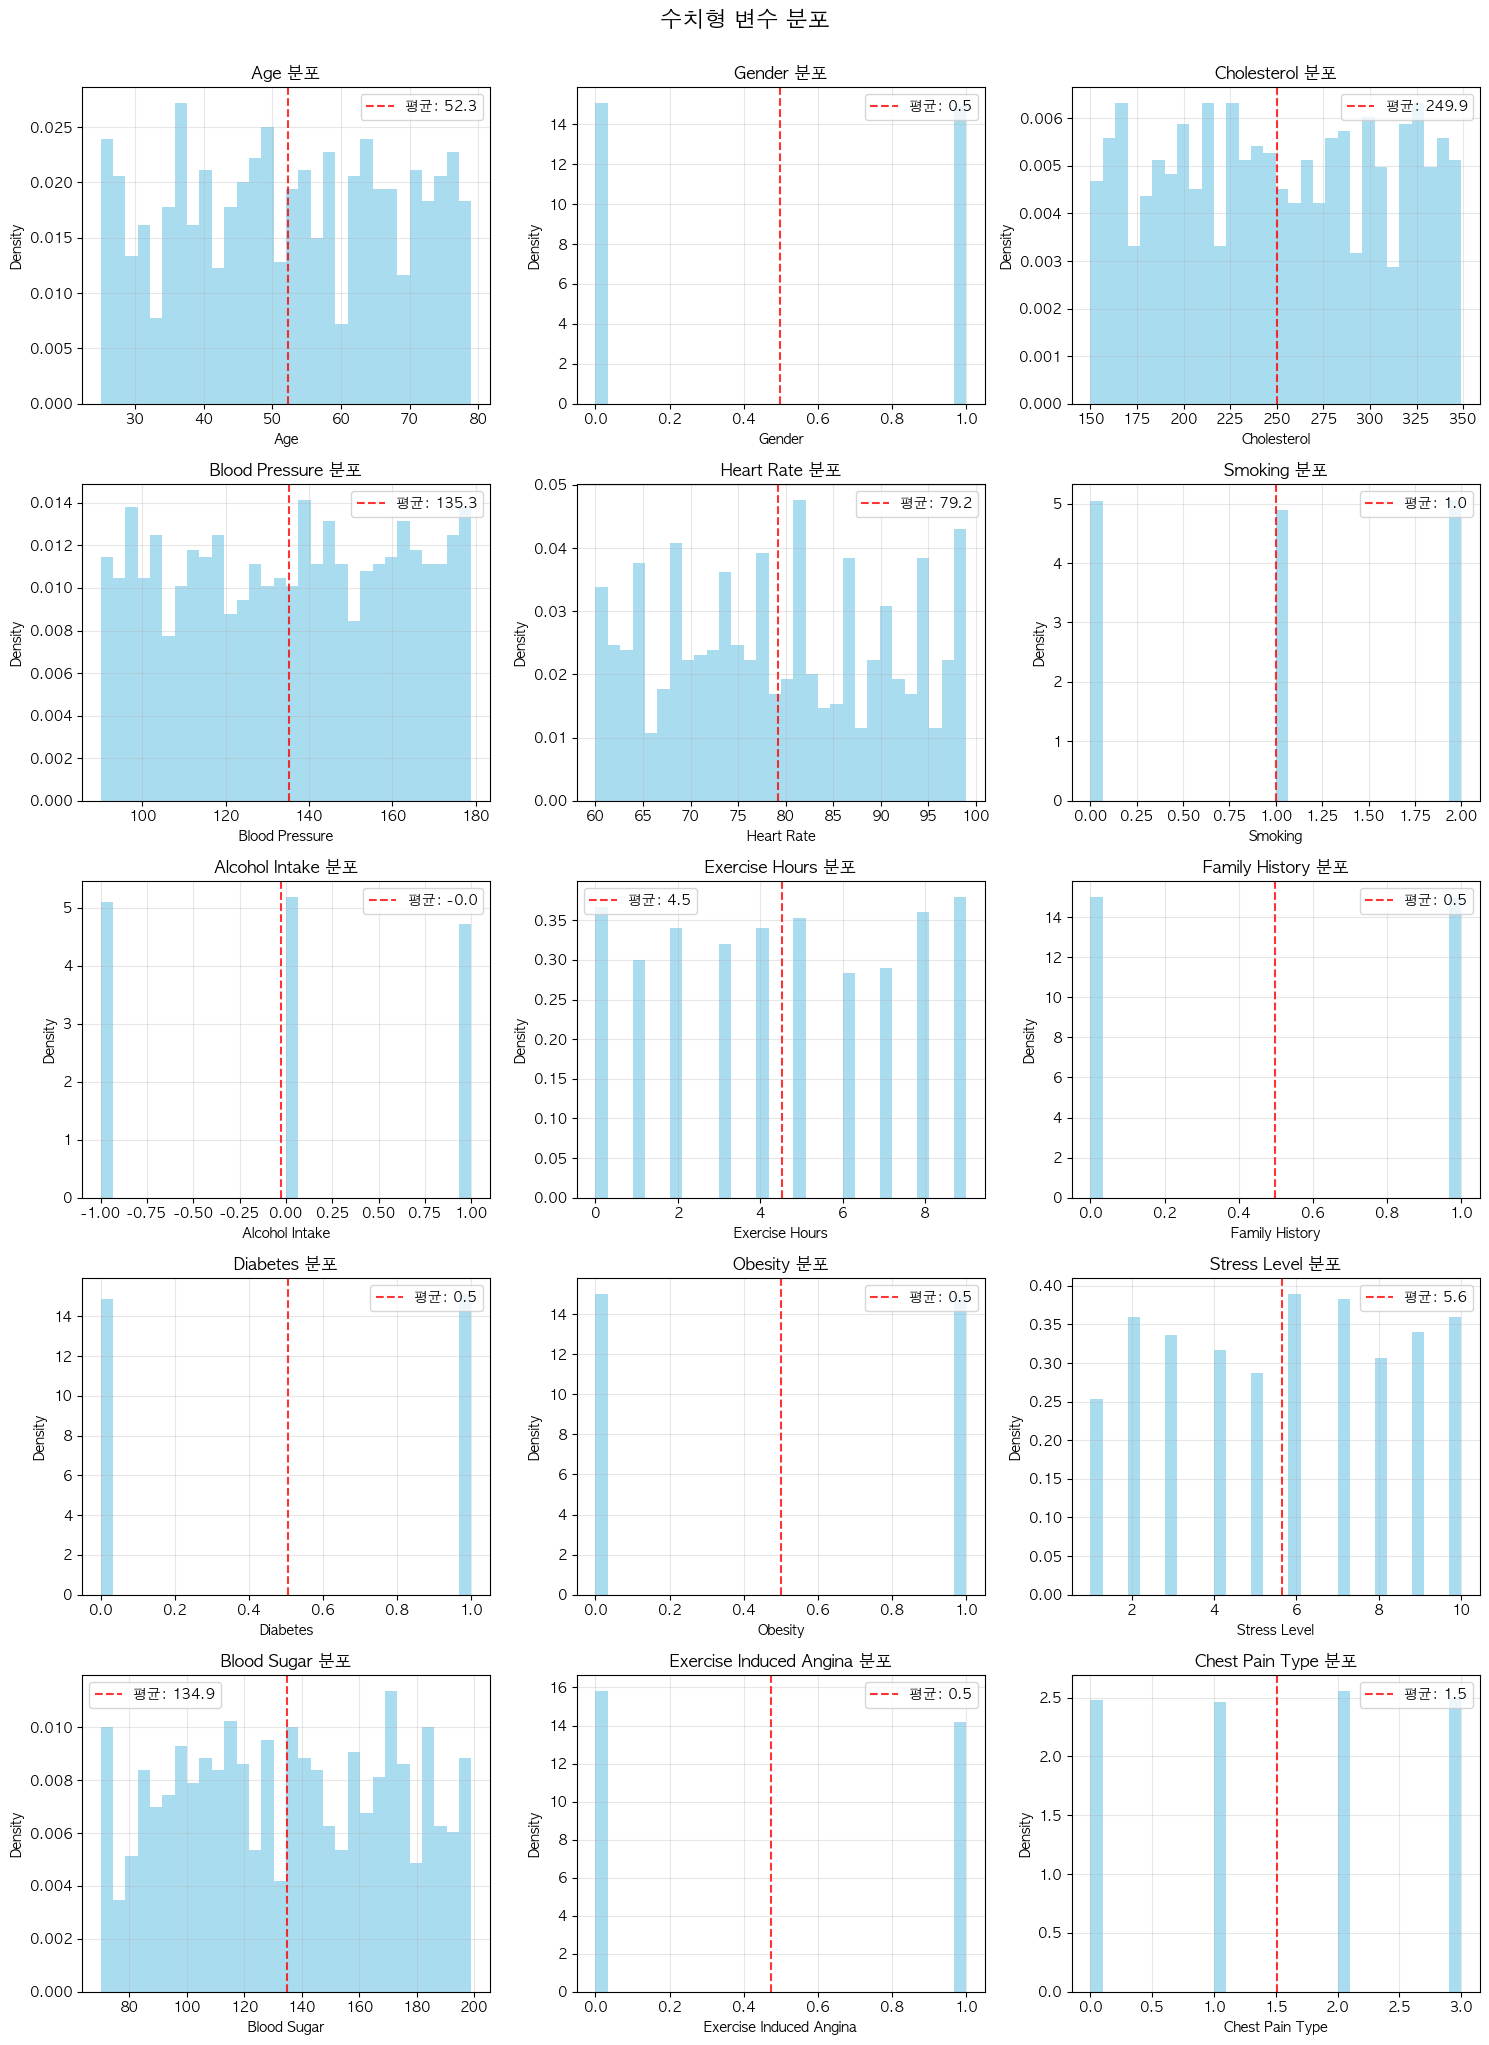


데이터셋 기본 정보
전체 샘플 수: 1000
전체 컬럼 수: 15
전체 결측값 개수: 0
결측값이 있는 컬럼: 없음

수치형 변수 기본 통계:
--------------------------------------------------
           Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
count  1000.00  1000.0      1000.00         1000.00     1000.00  1000.00   
mean     52.29     0.5       249.94          135.28       79.20     1.00   
std      15.73     0.5        57.91           26.39       11.49     0.82   
min      25.00     0.0       150.00           90.00       60.00     0.00   
25%      39.00     0.0       200.00          112.75       70.00     0.00   
50%      52.00     0.0       248.00          136.00       79.00     1.00   
75%      66.00     1.0       299.00          159.00       89.00     2.00   
max      79.00     1.0       349.00          179.00       99.00     2.00   

       Alcohol Intake  Exercise Hours  Family History  Diabetes  Obesity  \
count         1000.00         1000.00          1000.0    1000.0   1000.0   
mean            -0.03          

In [32]:
# 각 컬럼의 데이터 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 원본 데이터프레임 사용 (인코딩 전)
df_original = pd.read_csv('./heart_disease_dataset.csv')

df_original = X

# 수치형과 범주형 컬럼 분리
numeric_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_original.select_dtypes(include=['object']).columns.tolist()

print(f"수치형 컬럼 ({len(numeric_cols)}개): {numeric_cols}")
print(f"범주형 컬럼 ({len(categorical_cols)}개): {categorical_cols}")

# 1. 수치형 변수 분포 시각화
if numeric_cols:
    n_numeric = len(numeric_cols)
    cols = 3
    rows = (n_numeric + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(numeric_cols):
        row = i // cols
        col_idx = i % cols
        
        # 히스토그램과 KDE
        axes[row, col_idx].hist(df_original[col], bins=30, alpha=0.7, density=True, color='skyblue')
        axes[row, col_idx].set_title(f'{col} 분포')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Density')
        axes[row, col_idx].grid(alpha=0.3)
        
        # 기본 통계 정보 텍스트 추가
        mean_val = df_original[col].mean()
        std_val = df_original[col].std()
        axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'평균: {mean_val:.1f}')
        axes[row, col_idx].legend()
    
    # 빈 서브플롯 제거
    for i in range(n_numeric, rows * cols):
        row = i // cols
        col_idx = i % cols
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('수치형 변수 분포', fontsize=16, y=1.02)
    plt.show()

# 2. 범주형 변수 분포 시각화
if categorical_cols:
    n_categorical = len(categorical_cols)
    cols = 2
    rows = (n_categorical + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif n_categorical == 1:
        axes = [axes]
    
    for i, col in enumerate(categorical_cols):
        row = i // cols
        col_idx = i % cols
        
        # 막대그래프
        value_counts = df_original[col].value_counts()
        bars = axes[row, col_idx].bar(range(len(value_counts)), value_counts.values, color='lightcoral', alpha=0.7)
        axes[row, col_idx].set_xticks(range(len(value_counts)))
        axes[row, col_idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[row, col_idx].set_title(f'{col} 분포')
        axes[row, col_idx].set_ylabel('Count')
        axes[row, col_idx].grid(axis='y', alpha=0.3)
        
        # 막대 위에 개수 표시
        for bar, count in zip(bars, value_counts.values):
            axes[row, col_idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                                   str(count), ha='center', va='bottom')
    
    # 빈 서브플롯 제거
    for i in range(n_categorical, rows * cols):
        row = i // cols
        col_idx = i % cols
        if rows > 1:
            axes[row, col_idx].set_visible(False)
        else:
            axes[col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('범주형 변수 분포', fontsize=16, y=1.02)
    plt.show()

# 3. 기본 통계 정보 출력
print("\n" + "="*80)
print("데이터셋 기본 정보")
print("="*80)
print(f"전체 샘플 수: {len(df_original)}")
print(f"전체 컬럼 수: {len(df_original.columns)}")

# 결측값 확인
missing_values = df_original.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print(f"전체 결측값 개수: {missing_values.sum()}")
if len(missing_columns) > 0:
    print("결측값이 있는 컬럼:")
    for col, count in missing_columns.items():
        percentage = (count / len(df_original)) * 100
        print(f"  - {col}: {count}개 ({percentage:.1f}%)")
else:
    print("결측값이 있는 컬럼: 없음")

print("\n수치형 변수 기본 통계:")
print("-" * 50)
print(df_original[numeric_cols].describe().round(2))

print("\n범주형 변수 분포:")
print("-" * 50)
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_original[col].value_counts())
    
# 4. Heart Disease 분포 (타겟 변수)
if 'Heart Disease' in df_original.columns:
    plt.figure(figsize=(8, 5))
    target_counts = df_original['Heart Disease'].value_counts()
    
    # 파이 차트
    plt.subplot(1, 2, 1)
    plt.pie(target_counts.values, labels=['No Heart Disease', 'Heart Disease'], 
            autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    plt.title('Heart Disease 분포 (파이차트)')
    
    # 막대 차트
    plt.subplot(1, 2, 2)
    bars = plt.bar(['No (0)', 'Yes (1)'], target_counts.values, color=['lightgreen', 'lightcoral'], alpha=0.7)
    plt.title('Heart Disease 분포 (막대차트)')
    plt.ylabel('Count')
    
    # 막대 위에 개수와 비율 표시
    total = target_counts.sum()
    for bar, count in zip(bars, target_counts.values):
        percentage = count / total * 100
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nHeart Disease 분포:")
    print(f"정상 (0): {target_counts[0]}명 ({target_counts[0]/total*100:.1f}%)")
    print(f"심장병 (1): {target_counts[1]}명 ({target_counts[1]/total*100:.1f}%)")


[Voting 앙상블 평가]
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
ROC AUC  : 1.0


/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:19:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


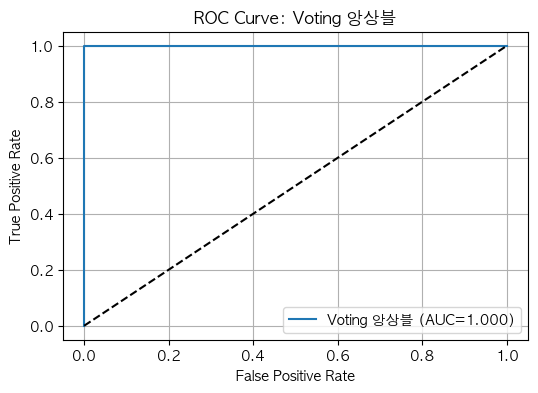

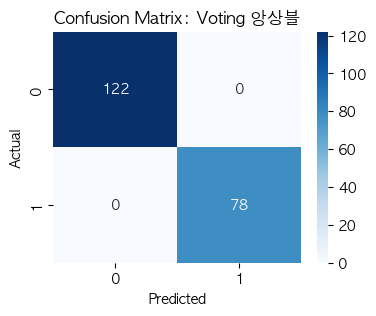

/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:19:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:19:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:19:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:19:48] WARNING: /Users/runner/work/xgboost/xgbo


[Stacking 앙상블 평가]
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
ROC AUC  : 1.0


/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


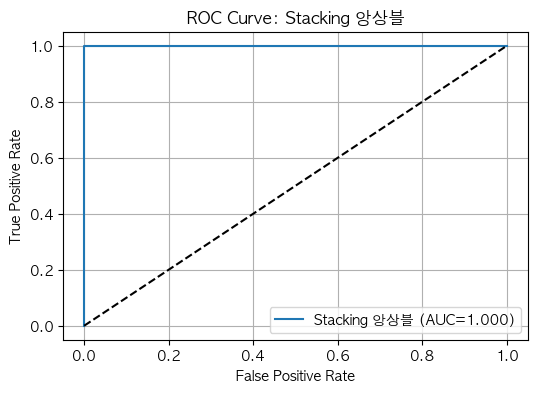

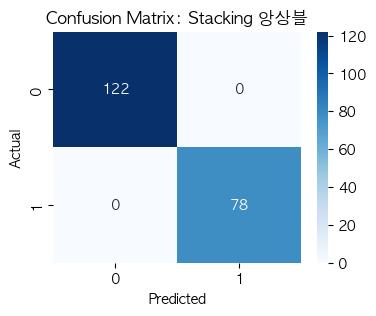

Epoch 1/30


/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5126 - loss: 35.6115 - val_accuracy: 0.4875 - val_loss: 13.2074
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4912 - loss: 31.6682 - val_accuracy: 0.5250 - val_loss: 10.7642
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5818 - loss: 22.2680 - val_accuracy: 0.5625 - val_loss: 9.1834
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5123 - loss: 25.1252 - val_accuracy: 0.5625 - val_loss: 5.9572
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5928 - loss: 17.4017 - val_accuracy: 0.6125 - val_loss: 4.1856
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5541 - loss: 18.7502 - val_accuracy: 0.6125 - val_loss: 5.2399
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5874 - loss: 16.4228 - val_accuracy: 0.6375 - val_loss: 5.3296
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5991 - loss: 16.5402 - val_accuracy: 0.6875 - val_loss:

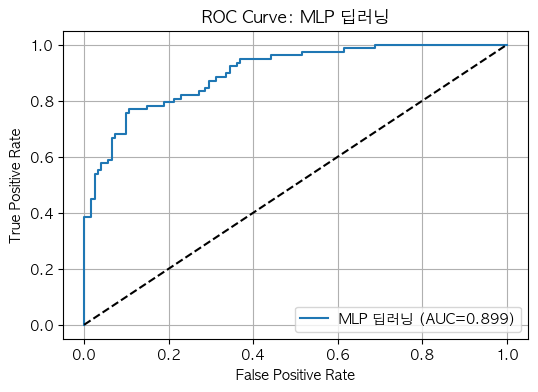

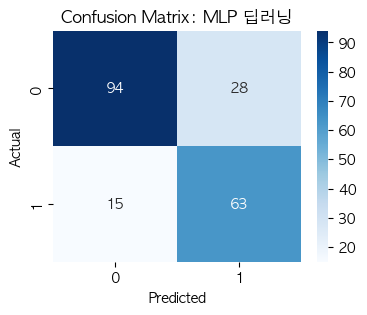

In [27]:

# 5. 학습/테스트 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 6. 공통 평가 및 시각화 함수
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, roc_curve)

def print_metrics(y_true, y_pred, y_prob, model_name="Model"):
    print(f"\n[{model_name} 평가]")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall   :", recall_score(y_true, y_pred, zero_division=0))
    print("F1 Score :", f1_score(y_true, y_pred, zero_division=0))
    print("ROC AUC  :", roc_auc_score(y_true, y_prob))

def plot_roc_curve(y_true, y_prob, model_name="Model"):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC={roc_auc_score(y_true, y_prob):.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'ROC Curve: {model_name}')
    plt.legend()
    plt.grid()
    plt.show()

def plot_confusion(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# 7. 앙상블 1: VotingClassifier(RandomForest+GradientBoosting+XGBoost)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

voting = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('xgb', xgb)],
    voting='soft'
)
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
y_prob_voting = voting.predict_proba(X_test)[:,1]

print_metrics(y_test, y_pred_voting, y_prob_voting, model_name="Voting 앙상블")
plot_roc_curve(y_test, y_prob_voting, model_name="Voting 앙상블")
plot_confusion(y_test, y_pred_voting, model_name="Voting 앙상블")

# 8. 앙상블 2: StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'))
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
y_prob_stacking = stacking.predict_proba(X_test)[:,1]

print_metrics(y_test, y_pred_stacking, y_prob_stacking, model_name="Stacking 앙상블")
plot_roc_curve(y_test, y_prob_stacking, model_name="Stacking 앙상블")
plot_confusion(y_test, y_pred_stacking, model_name="Stacking 앙상블")

# 9. 딥러닝: MLP
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=16, verbose=1)

y_prob_mlp = model.predict(X_test).flatten()
y_pred_mlp = (y_prob_mlp > 0.5).astype(int)

print_metrics(y_test, y_pred_mlp, y_prob_mlp, model_name="MLP 딥러닝")
plot_roc_curve(y_test, y_prob_mlp, model_name="MLP 딥러닝")
plot_confusion(y_test, y_pred_mlp, model_name="MLP 딥러닝")


In [ ]:
# F1 Score 1.0 원인 분석 리포트
print("\n" + "="*80)
print("F1 Score 1.0 원인 분석 리포트")
print("="*80)

# 1. 데이터셋 크기 및 분할 확인
print(f"1. 데이터셋 크기 분석:")
print(f"   - 전체 데이터 크기: {len(df)}")
print(f"   - 훈련 데이터 크기: {len(X_train)}")
print(f"   - 테스트 데이터 크기: {len(X_test)}")
print(f"   - 특성 개수: {X_train.shape[1]}")
print(f"   - 데이터 대비 특성 비율: {X_train.shape[1]/len(X_train):.3f}")

if X_train.shape[1]/len(X_train) > 0.1:
    print("   ⚠️  특성 개수가 데이터 크기 대비 많음 (Curse of Dimensionality 가능성)")

# 2. 클래스 불균형 확인
print(f"\n2. 클래스 분포 분석:")
train_class_dist = y_train.value_counts().sort_index()
test_class_dist = y_test.value_counts().sort_index()
print(f"   - 훈련 데이터 클래스 분포: {dict(train_class_dist)}")
print(f"   - 테스트 데이터 클래스 분포: {dict(test_class_dist)}")

minority_ratio = min(train_class_dist) / len(y_train)
print(f"   - 소수 클래스 비율: {minority_ratio:.3f}")

if minority_ratio < 0.1:
    print("   ⚠️  심각한 클래스 불균형 존재")

# 3. 데이터 누수(Data Leakage) 확인
print(f"\n3. 데이터 누수 가능성 검사:")

# 중복 행 확인
duplicate_rows = df.duplicated().sum()
print(f"   - 중복 행 개수: {duplicate_rows}")

if duplicate_rows > 0:
    print("   ⚠️  데이터에 중복 행이 존재함")


df_copy = X.copy()
df_copy['Heart Disease'] = y
# 완벽한 상관관계 확인 (타겟과 1.0 또는 -1.0 상관관계)
perfect_corr_features = []
for feature in X.columns:
    corr = abs(df_copy[feature].corr(df_copy['Heart Disease']))
    if corr > 0.99:  # 거의 완벽한 상관관계
        perfect_corr_features.append((feature, corr))

if perfect_corr_features:
    print("   ⚠️  타겟과 거의 완벽한 상관관계를 가진 특성들:")
    for feature, corr in perfect_corr_features:
        print(f"      - {feature}: {corr:.4f}")
else:
    print("   ✓ 타겟과 완벽한 상관관계를 가진 특성 없음")

# 4. 모델별 상세 예측 분석
print(f"\n4. 모델 예측 결과 상세 분석:")

models_results = {
    'Voting': (y_pred_voting, y_prob_voting),
    'Stacking': (y_pred_stacking, y_prob_stacking),
    'MLP': (y_pred_mlp, y_prob_mlp)
}

for model_name, (y_pred, y_prob) in models_results.items():
    # 예측 확률 분포 확인
    prob_std = np.std(y_prob)
    prob_range = np.max(y_prob) - np.min(y_prob)
    
    print(f"\n   {model_name} 모델:")
    print(f"   - 예측 확률 표준편차: {prob_std:.4f}")
    print(f"   - 예측 확률 범위: {prob_range:.4f}")
    print(f"   - 예측 정확도: {accuracy_score(y_test, y_pred):.4f}")
    print(f"   - F1 Score: {f1_score(y_test, y_pred):.4f}")
    
    # 잘못 분류된 샘플 확인
    misclassified = np.sum(y_test != y_pred)
    print(f"   - 잘못 분류된 샘플: {misclassified}개")
    
    if prob_std < 0.1:
        print("   ⚠️  예측 확률의 변동성이 매우 낮음 (과적합 가능성)")
    
    if misclassified == 0:
        print("   ⚠️  완벽한 분류 결과 (의심스러운 결과)")

# 5. 교차 검증으로 일반화 성능 확인
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
print(f"\n5. 교차 검증 결과 (일반화 성능 확인):")

# 결정트리 모델로 교차 검증 수행
simple_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
cv_scores = cross_val_score(simple_dt, X, y, cv=5, scoring='f1')
print(f"   - 5-Fold CV F1 Score: {cv_scores}")
print(f"   - 평균 F1 Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

if cv_scores.mean() > 0.95:
    print("   ⚠️  교차 검증에서도 비현실적으로 높은 성능")
elif cv_scores.std() > 0.1:
    print("   ⚠️  교차 검증 점수의 변동성이 큼 (불안정한 모델)")

# 6. 권장사항
print(f"\n6. 권장사항:")
print("   - 데이터 수집 과정 재검토")
print("   - 특성 엔지니어링 과정에서 미래 정보 사용 여부 확인")
print("   - 더 큰 데이터셋으로 검증")
print("   - Hold-out validation set으로 추가 검증")
print("   - 도메인 전문가와 결과 검토")

if len(X_train) < 1000:
    print("   - 더 많은 데이터 수집 고려")
    
if X_train.shape[1] > 20:
    print("   - 특성 선택/차원 축소 기법 적용 고려")


F1 Score 1.0 원인 분석 리포트
1. 데이터셋 크기 분석:
   - 전체 데이터 크기: 1000
   - 훈련 데이터 크기: 800
   - 테스트 데이터 크기: 200
   - 특성 개수: 15
   - 데이터 대비 특성 비율: 0.019

2. 클래스 분포 분석:
   - 훈련 데이터 클래스 분포: {0: 486, 1: 314}
   - 테스트 데이터 클래스 분포: {0: 122, 1: 78}
   - 소수 클래스 비율: 0.393

3. 데이터 누수 가능성 검사:
   - 중복 행 개수: 0
   ✓ 타겟과 완벽한 상관관계를 가진 특성 없음

4. 모델 예측 결과 상세 분석:

   Voting 모델:
   - 예측 확률 표준편차: 0.4493
   - 예측 확률 범위: 0.9925
   - 예측 정확도: 1.0000
   - F1 Score: 1.0000
   - 잘못 분류된 샘플: 0개
   ⚠️  완벽한 분류 결과 (의심스러운 결과)

   Stacking 모델:
   - 예측 확률 표준편차: 0.4792
   - 예측 확률 범위: 0.9988
   - 예측 정확도: 1.0000
   - F1 Score: 1.0000
   - 잘못 분류된 샘플: 0개
   ⚠️  완벽한 분류 결과 (의심스러운 결과)

   MLP 모델:
   - 예측 확률 표준편차: 0.4599
   - 예측 확률 범위: 1.0000
   - 예측 정확도: 0.7850
   - F1 Score: 0.7456
   - 잘못 분류된 샘플: 43개

5. 교차 검증 결과 (일반화 성능 확인):
   - 5-Fold CV F1 Score: [1. 1. 1. 1. 1.]
   - 평균 F1 Score: 1.0000 (±0.0000)
   ⚠️  교차 검증에서도 비현실적으로 높은 성능

6. 권장사항:
   - 데이터 수집 과정 재검토
   - 특성 엔지니어링 과정에서 미래 정보 사용 여부 확인
   - 더 큰 데이터셋으로 검증
   - Hold-out validation set으